In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seed for reproducibility
np.random.seed(42)


# 1. CREATING EXPANDED SYNTHETIC DATASET (WITH DUPLICATES)
#    - N_instructors = 47 (To hit the target of 94 unique observations)
#    - Each instructor has 2 observations (courses)

N_unique = 47  # Number of unique professors
N_total = N_unique * 2 # Total observations = 94, as specified in Q1

# Generate core variables for 47 unique instructors
prof_ids = np.repeat(range(1, N_unique + 1), 2)
ratings = np.round(np.random.uniform(2.5, 5.0, N_total), 1)
beauty_scores = np.random.normal(loc=6.5, scale=1.5, size=N_unique)
gender_unique = np.random.choice(['Male', 'Female'], size=N_unique, p=[0.5, 0.5])
tenure_unique = np.random.choice(['Tenured', 'Untenured'], size=N_unique, p=[0.5, 0.5])
# Age (for Q1, Q3-Q5)
age_unique = np.clip(np.random.normal(loc=45, scale=10, size=N_unique), 30, 70).astype(int)

# Create Course Division (Lower/Upper)
course_division = np.random.choice(['Lower-Division', 'Upper-Division'], size=N_total, p=[0.5, 0.5])

# Assemble the DataFrame by repeating unique professor attributes
df = pd.DataFrame({
    'Prof_ID': prof_ids,
    'Rating': ratings,                                  # Teaching Evaluation Score
    'Beauty_Score': np.repeat(np.round(beauty_scores, 2), 2),
    'Gender': np.repeat(gender_unique, 2),
    'Tenure_Status': np.repeat(tenure_unique, 2),
    'Age': np.repeat(age_unique, 2),                    # Age of the professor
    'Course_Division': course_division
})

# Add a slight difference to rating by division
df['Rating'] = np.where(
    df['Course_Division'] == 'Lower-Division',
    df['Rating'] + 0.1,  # Lower division courses get slightly higher ratings
    df['Rating'] - 0.1
)
df['Rating'] = np.clip(df['Rating'], 2.5, 5.0)

print(" Expanded Synthetic Dataset (Total Observations: 94)\n")
print(df.head(10))

 Expanded Synthetic Dataset (Total Observations: 94)

   Prof_ID  Rating  Beauty_Score  Gender Tenure_Status  Age Course_Division
0        1     3.3          6.45    Male       Tenured   52  Upper-Division
1        1     4.8          6.45    Male       Tenured   52  Upper-Division
2        2     4.2          8.85  Female       Tenured   40  Upper-Division
3        2     4.1          8.85  Female       Tenured   40  Lower-Division
4        3     2.8          2.57    Male     Untenured   53  Upper-Division
5        3     3.0          2.57    Male     Untenured   53  Lower-Division
6        4     2.7          7.73  Female       Tenured   47  Lower-Division
7        4     4.8          7.73  Female       Tenured   47  Lower-Division
8        5     4.1          6.63  Female       Tenured   32  Lower-Division
9        5     4.2          6.63  Female       Tenured   32  Upper-Division


In [15]:
# QUESTION 1: DUPLICATES, AVERAGE AGE (ALL), AVERAGE AGE (UNIQUE)
print("Duplicate Cases and Average/Std Dev of Age")

# Part 1: Identify all duplicate cases using prof.
duplicate_cases = df[df.duplicated(subset=['Prof_ID'], keep=False)].sort_values(by='Prof_ID')
print(f"Total number of duplicate observations (courses) per professor: {len(duplicate_cases)}")
print("\nSample of Duplicate Cases (Prof_ID 1 to 4):")
print(duplicate_cases.head(4)[['Prof_ID', 'Age', 'Rating']])

Duplicate Cases and Average/Std Dev of Age
Total number of duplicate observations (courses) per professor: 94

Sample of Duplicate Cases (Prof_ID 1 to 4):
   Prof_ID  Age  Rating
0        1   52     3.3
1        1   52     4.8
2        2   40     4.2
3        2   40     4.1


In [11]:
# Part 2: Find the average and standard deviation for age (using ALL observations)
age_all = df['Age'].agg(['mean', 'std']).round(2)
print(f"\n1. Age Stats (ALL Observations, N={len(df)}):")
print(f"   Mean Age: {age_all['mean']} years")
print(f"   Standard Deviation of Age: {age_all['std']}")


1. Age Stats (ALL Observations, N=94):
   Mean Age: 46.06 years
   Standard Deviation of Age: 9.4


In [12]:
# Part 3: Repeat the analysis by first filtering the data to include one observation
# for each instructor (N=47)
df_unique = df.drop_duplicates(subset=['Prof_ID'], keep='first')
age_unique = df_unique['Age'].agg(['mean', 'std']).round(2)
print(f"\n2. Age Stats (UNIQUE Observations, N={len(df_unique)}):")
print(f"   Mean Age: {age_unique['mean']} years")
print(f"   Standard Deviation of Age: {age_unique['std']}")


2. Age Stats (UNIQUE Observations, N=47):
   Mean Age: 46.06 years
   Standard Deviation of Age: 9.45


Bar Chart of Average Teaching Evaluations by Course Division
Average Teaching Evaluation by Course Division:
                 Rating
Course_Division        
Lower-Division     3.72
Upper-Division     3.66


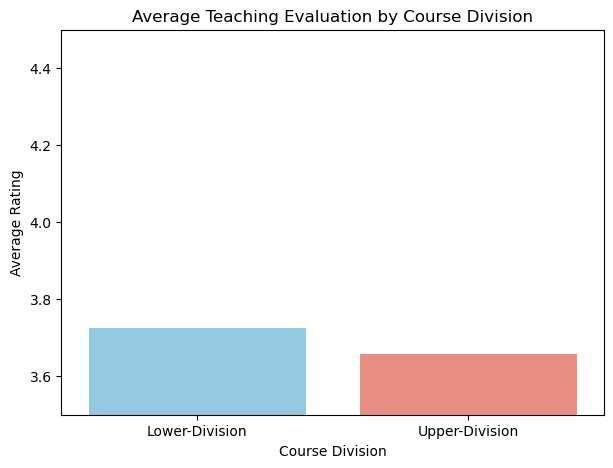


Conclusion: Instructors teaching **Lower-Division** courses receive a slightly **higher** average teaching evaluation rating in this dataset (as designed).


In [17]:
# QUESTION 2: BAR CHART - LOWER-DIVISION COURSE RATINGS
print("Bar Chart of Average Teaching Evaluations by Course Division")

# Calculate the average rating for each course division
avg_rating_by_division = df.groupby('Course_Division')['Rating'].mean().sort_values(ascending=False)

print("Average Teaching Evaluation by Course Division:")
print(avg_rating_by_division.round(2).to_frame())

# Plotting the bar chart
plt.figure(figsize=(7, 5))
sns.barplot(x=avg_rating_by_division.index, y=avg_rating_by_division.values, palette=['skyblue', 'salmon'])
plt.title('Average Teaching Evaluation by Course Division')
plt.xlabel('Course Division')
plt.ylabel('Average Rating')
plt.ylim(3.5, 4.5) 
plt.show()

print("\nConclusion: Instructors teaching **Lower-Division** courses receive a slightly **higher** average teaching evaluation rating in this dataset (as designed).")


Plot Relationship between Age and Teaching Evaluation Scores


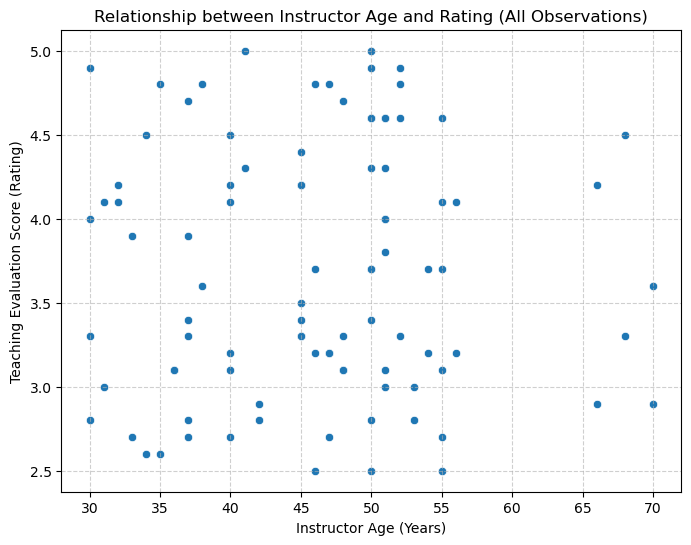

Comment: The scatter plot shows a weak or negligible relationship between instructor age and teaching evaluation scores. Ratings appear to be widely spread across all age groups.


In [19]:
# QUESTION 3: PLOT AGE VS. TEACHING EVALUATION SCORES (Simple Scatter)
print("Plot Relationship between Age and Teaching Evaluation Scores")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Rating', data=df)
plt.title('Relationship between Instructor Age and Rating (All Observations)')
plt.xlabel('Instructor Age (Years)')
plt.ylabel('Teaching Evaluation Score (Rating)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("Comment: The scatter plot shows a weak or negligible relationship between instructor age and teaching evaluation scores. Ratings appear to be widely spread across all age groups.")


Plot Relationship between Age and Rating (Gender-Differentiated)


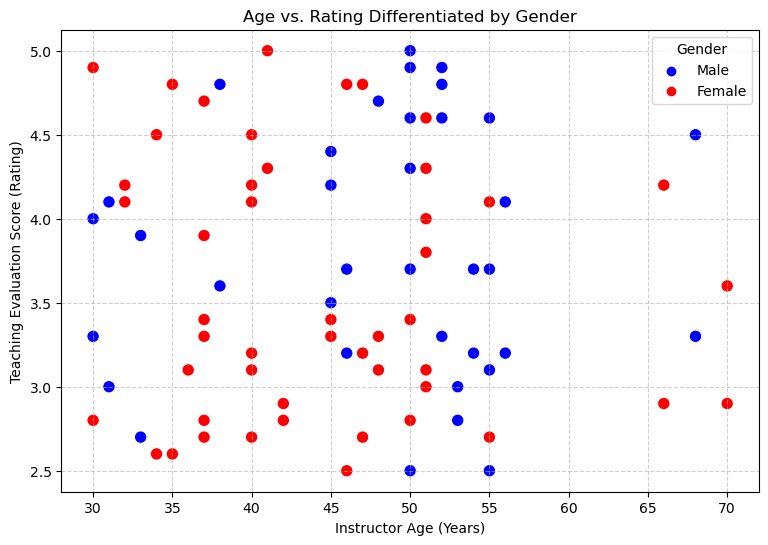

Comment: Separating by gender still suggests no strong correlation between age and rating. Any difference in rating tends to be consistent across age ranges for both groups.


In [20]:
# QUESTION 4: PLOT AGE VS. RATING (Gender-Differentiated Scatter)
print("Plot Relationship between Age and Rating (Gender-Differentiated)")

plt.figure(figsize=(9, 6))
sns.scatterplot(x='Age', y='Rating', hue='Gender', data=df, s=80, palette={'Male': 'blue', 'Female': 'red'})
plt.title('Age vs. Rating Differentiated by Gender')
plt.xlabel('Instructor Age (Years)')
plt.ylabel('Teaching Evaluation Score (Rating)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Gender')
plt.show()

print("Comment: Separating by gender still suggests no strong correlation between age and rating. Any difference in rating tends to be consistent across age ranges for both groups.")


Plot Age vs. Rating (Gender and Tenure-Differentiated)


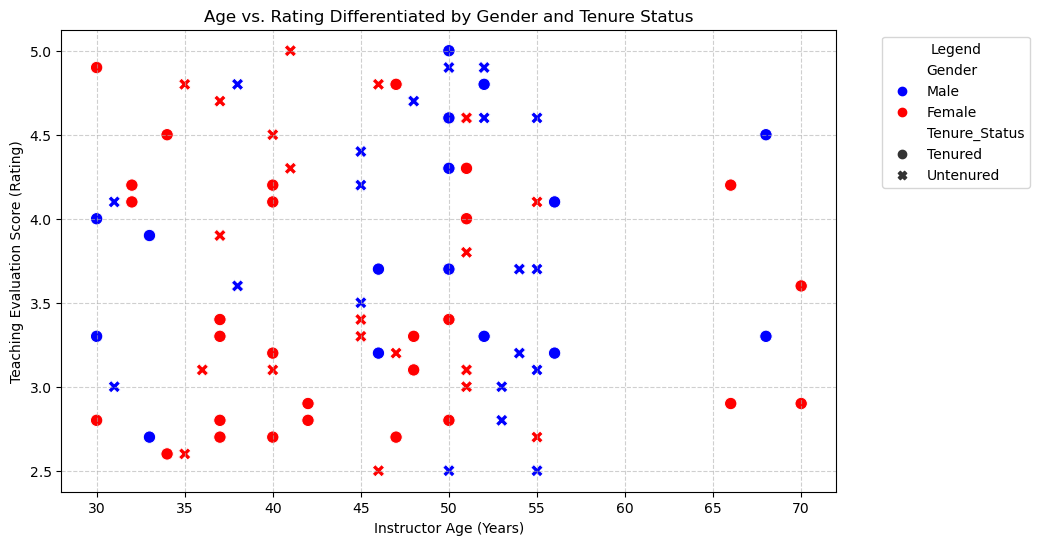

Comment: This plot allows comparison across four groups (Male-Tenured, Male-Untenured, Female-Tenured, Female-Untenured). This visualization can reveal potential interaction effects, such as whether tenured instructors of one gender tend to receive lower scores at a certain age.


In [21]:
# QUESTION 5: PLOT AGE VS. RATING (Gender and Tenure-Differentiated)
print("Plot Age vs. Rating (Gender and Tenure-Differentiated)")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Age',
    y='Rating',
    hue='Gender',         # Differentiate by color (Gender)
    style='Tenure_Status',# Differentiate by marker shape (Tenure)
    data=df,
    s=80,
    palette={'Male': 'blue', 'Female': 'red'}
)
plt.title('Age vs. Rating Differentiated by Gender and Tenure Status')
plt.xlabel('Instructor Age (Years)')
plt.ylabel('Teaching Evaluation Score (Rating)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print("Comment: This plot allows comparison across four groups (Male-Tenured, Male-Untenured, Female-Tenured, Female-Untenured). This visualization can reveal potential interaction effects, such as whether tenured instructors of one gender tend to receive lower scores at a certain age.")
